In [36]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [41]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


#### Missing Data

In [42]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

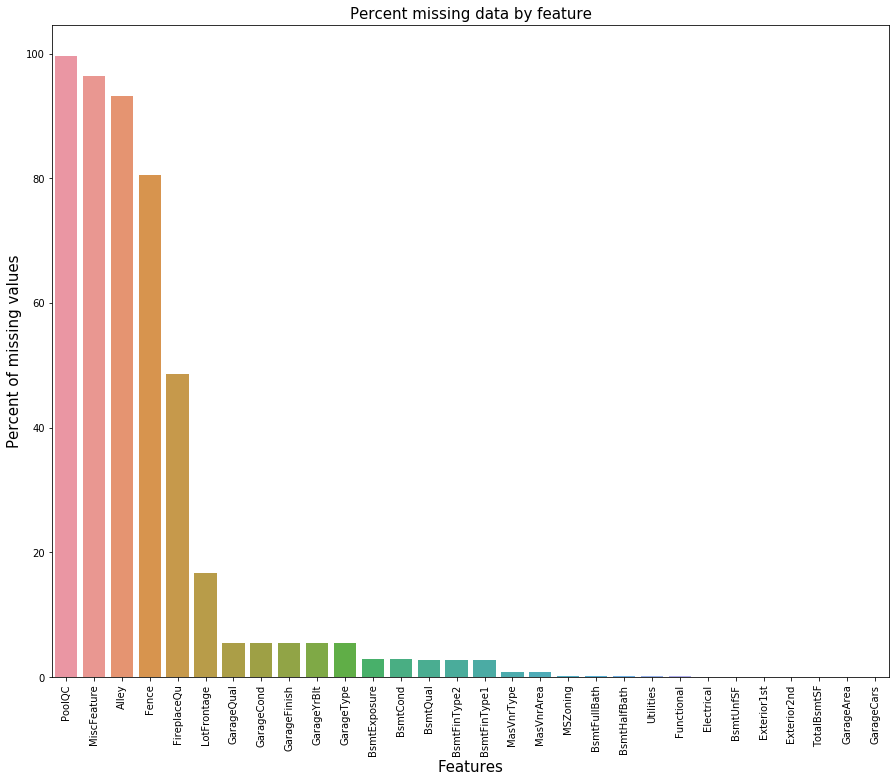

In [43]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

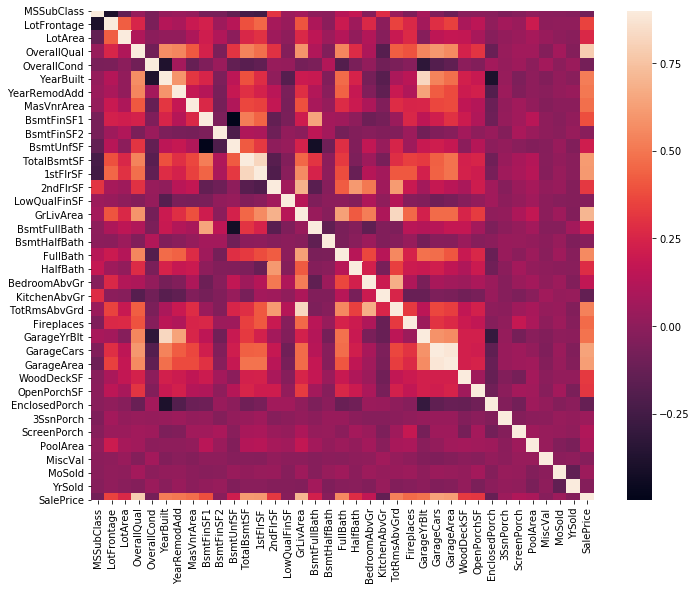

In [44]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### Imputing missing values 

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [45]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [46]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [47]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence : data description says NA means "no fence"

In [48]:
all_data["Fence"] = all_data["Fence"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"

In [49]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [50]:
all_data["Neighborhood"]
# ["LotFrontage"]

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, Length: 2919, dtype: object

In [51]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [52]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [53]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [54]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [55]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type

In [56]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [57]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [58]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [59]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [60]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [61]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [62]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [63]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [64]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [65]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [66]:
# all_data.select_dtypes('object').nunique()

Transforming some numerical variables that are really categorical

In [67]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [68]:
# all_data['FireplaceQu'].unique()

In [69]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [70]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [72]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,WD,0,1,8,856.0,0,2003,2003,2,2566.0
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,WD,0,1,6,1262.0,298,1976,1976,1,2524.0
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,WD,0,1,6,920.0,0,2001,2002,2,2706.0
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,WD,0,1,7,756.0,0,1915,1970,0,2473.0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,WD,0,1,9,1145.0,192,2000,2000,2,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,1,3,Twnhs,4,3,0.0,0.0,...,WD,0,1,5,546.0,0,1970,1970,0,1638.0
2915,546,546,0,1,3,TwnhsE,4,3,252.0,0.0,...,WD,0,1,6,546.0,0,1970,1970,0,1638.0
2916,1224,0,0,1,4,1Fam,4,3,1224.0,0.0,...,WD,0,1,7,1224.0,474,1960,1996,0,2448.0
2917,970,0,0,1,3,1Fam,4,0,337.0,0.0,...,WD,0,1,6,912.0,80,1992,1992,0,1882.0


In [73]:
all_data.select_dtypes(include = ["object"]).columns

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

In [74]:
all_data.select_dtypes(exclude = ["object"]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
# categorical_features = train.select_dtypes(include = ["object"]).columns
# numerical_features = train.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")
# print("Numerical features : " + str(len(numerical_features)))
# print("Categorical features : " + str(len(categorical_features)))
# train_num = train[numerical_features]
# train_cat = train[categorical_features]

In [76]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [84]:
all_data[:1460]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
1456,2073,0,0,1,3,4,3,790.0,163.0,0,...,0,0,0,0,0,0,0,0,0,1
1457,1188,1152,0,1,4,1,3,275.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1458,1078,0,0,1,2,4,2,49.0,1029.0,2,...,0,0,0,0,0,0,0,0,0,1


In [81]:
all_data[1460:]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1460,896,0,0,1,2,4,3,468.0,144.0,5,...,0,0,0,0,0,0,0,0,0,1
1461,1329,0,0,1,3,4,3,923.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1462,928,701,0,1,3,4,3,791.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1463,926,678,0,1,3,4,3,602.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1464,1280,0,0,1,2,4,3,263.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
2915,546,546,0,1,3,4,3,252.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
2916,1224,0,0,1,4,4,3,1224.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2917,970,0,0,1,3,4,0,337.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1


In [85]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [86]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1460,896,0,0,1,2,4,3,468.0,144.0,5,...,0,0,0,0,0,0,0,0,0,1
1461,1329,0,0,1,3,4,3,923.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1462,928,701,0,1,3,4,3,791.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1463,926,678,0,1,3,4,3,602.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1464,1280,0,0,1,2,4,3,263.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
2915,546,546,0,1,3,4,3,252.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
2916,1224,0,0,1,4,4,3,1224.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2917,970,0,0,1,3,4,0,337.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1


In [87]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
1456,2073,0,0,1,3,4,3,790.0,163.0,0,...,0,0,0,0,0,0,0,0,0,1
1457,1188,1152,0,1,4,1,3,275.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1458,1078,0,0,1,2,4,2,49.0,1029.0,2,...,0,0,0,0,0,0,0,0,0,1


In [88]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [89]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [90]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [91]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [92]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [93]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298463168096.7749, tolerance: 759214014.2531197
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265573910372.55942, tolerance: 728773513.025937
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243554956615.03995, tolerance: 699031751.5199751
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290802058050.65765, tolerance: 770619031.183406


Lasso score: 35017.2493 (8375.9715)



C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278621334498.3085, tolerance: 724930391.3116124
  positive)


In [94]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311613258636.71387, tolerance: 759214014.2531197
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277498002910.3466, tolerance: 728773513.025937
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259361691770.33563, tolerance: 699031751.5199751
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302796736965.21704, tolerance: 770619031.183406

ElasticNet score: 35065.0745 (7930.8870)



C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280901933712.3543, tolerance: 724930391.3116124
  positive)


In [95]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 25237.5608 (3941.6865)

